# Libraries


In [161]:
import matplotlib.pyplot as plt
import pandas as pd 

from datetime import datetime
from matplotlib.pyplot import figure

# Validate user choice and create custom header


In [162]:
def user_choice():
    while True:
        try:
            print("Please choose which data you want to \n")
            print("A/a for U.S data")
            print("B/b for state data")
            choice = input("Enter: ")
            print('\n')
        except ValueError:
            print("Invalid choice") 
            continue
        if choice.lower() not in ('a', 'b'): 
            print("Invalid choice")
            continue
        if choice.lower() == 'q':
            return
        else:
            if(choice.lower() == "a"):
                header = ['data', 'cases', 'deaths']
                return 'a'
            elif(choice.lower() == "b"):
                header = ['date', 'state', 'fips' ,'cases', 'deaths']
                return 'b'
            break; 

# read csv file from source


In [163]:
def read_file(choice):
    if(choice == 'a'):
        df = pd.read_csv("https://github.com/nytimes/covid-19-data/raw/master/us.csv")
    else:
        df = pd.read_csv("https://github.com/nytimes/covid-19-data/raw/master/us-states.csv")
    return df

# Visualization the data 


In [164]:
def visualization():
    choice = user_choice()
    data = read_file(choice)
    
    data['date'] = data['date'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
    #list(data)
    #data.head()
    
    fig, ax = plt.subplots()
    plt.style.use('seaborn-darkgrid')
    plt.xlabel("Dates", fontsize = 12)
    plt.ylabel("Cases", fontsize = 12)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
    
    if(choice == 'a'): 
        ax.set_ylabel('Cases in millions')
        ax.plot(data['date'], data['cases'], c = 'blue', label = 'Total cases', linewidth = 0.8, markersize = 5)
        ax.plot(data['date'], data['deaths'], c = 'green', label = 'Total death cases', linewidth = 0.8, markersize = 5)
        plt.title("Daily death cases and total cases in United States 2020-2021", fontsize = 20)
    else: 
        data.sort_values(by=['date','state'])
        while True:
            try:
                print("Please choose which state you want to see \n")
                choice = input("Enter: ")
            except ValueError:
                print("Invalid choice") 
                continue
            if choice == 'q':
                break
            if choice in data.values:
                plt.title(f"Daily death cases And total cases in {choice} 2020-2021", fontsize = 20)
                data2 = data[data['state'] == choice]
                ax.plot(data2['date'], data2['cases'], c = 'blue', label = 'Total cases', linewidth = 0.8, markersize = 5)
                ax.plot(data2['date'], data2['deaths'], c = 'green', label = 'Total death cases', linewidth = 0.8, markersize = 5)
                
            else:
                print('No data for state you choice')
                continue
            break
        
    ax.legend()
    plt.gcf().autofmt_xdate()
    plt.show()

# general info for U.S


In [175]:
us_Data = read_file(user_choice())
us_Data.info()

Please choose which data you want to 

A/a for U.S data
B/b for state data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    577 non-null    object
 1   cases   577 non-null    int64 
 2   deaths  577 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.6+ KB


# U.S data   


In [173]:
us_Data = read_file(user_choice())
us_Data.head()

Please choose which data you want to 

A/a for U.S data
B/b for state data


,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


# States data


# general info for state


In [170]:
state_Data = read_file(user_choice())
state_Data.info()

Please choose which data you want to 

A/a for U.S data
B/b for state data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29439 entries, 0 to 29438
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    29439 non-null  object
 1   state   29439 non-null  object
 2   fips    29439 non-null  int64 
 3   cases   29439 non-null  int64 
 4   deaths  29439 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


# state data


In [174]:
state_Data = read_file(user_choice())
state_Data.head()

Please choose which data you want to 

A/a for U.S data
B/b for state data


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


# USA visualization


Please choose which data you want to 

A/a for U.S data
B/b for state data


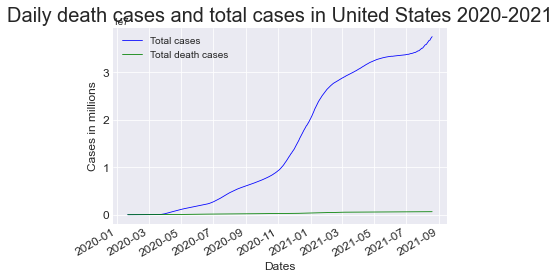

In [165]:
usa = visualization()

# new york data


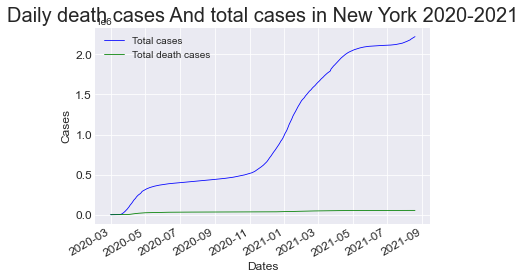

In [166]:
#new york
new_york = visualization()

# California data


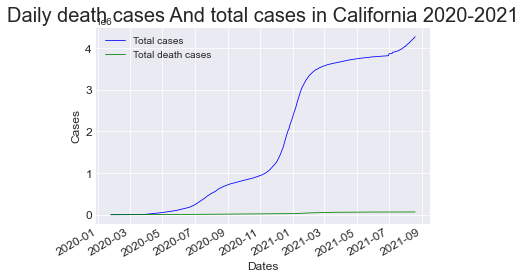

In [167]:
#cali state
cali = visualization()

# Nevada data


Please choose which data you want to 

A/a for U.S data
B/b for state data
Please choose which state you want to see 



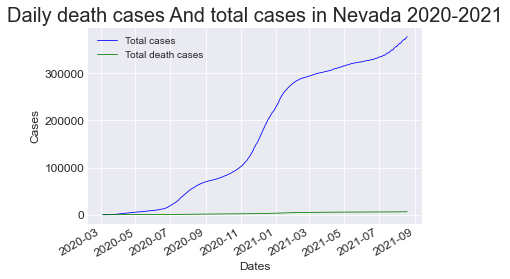

In [168]:
#nevada state 
nevada = visualization()

# Function for bar chart


In [177]:
def bar_chart(data = 'cases', state = 'California'):
    choice = user_choice()
    data = read_file(choice)
    
    y = data['cases']
    x = data['date']
    
    plt.title(f"Plot bar data {data} chart for {state}", fontsize = 12)

    plt.bar(x = x, height = y, color = 'green', edgecolor = 'k')
    plt.grid(True)
    plt.xticks(fontsize = 12, rotation = 40)
    plt.yticks(fontsize = 12)
    plt.show()


In [178]:
bar_chart()

TypeError: string indices must be integers